## Zadanie 1
Dla danych `boston` stwórz modele nieliniowe (np. wielomianowe) i modele zawierające interakcje. Przeprowadź ich diagnostykę i porównaj z modelami stworzonymi we wcześniejszym zadaniu.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

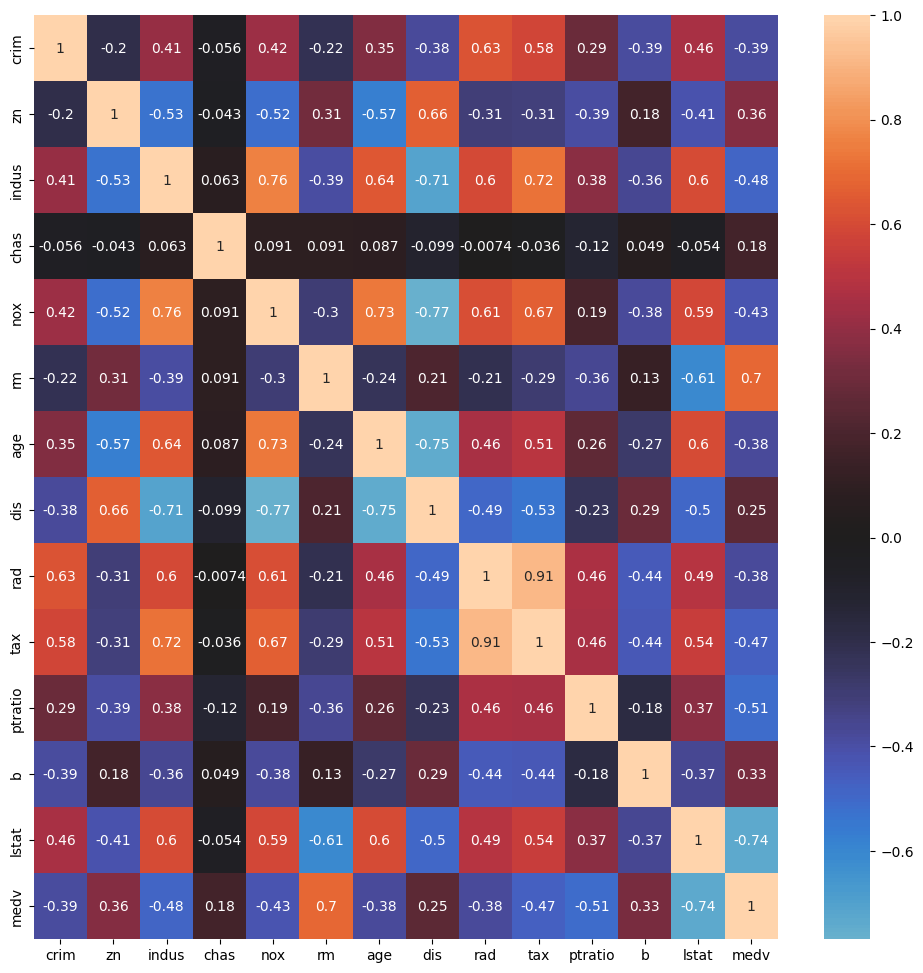

In [4]:
df = pd.read_csv("./data/boston.csv")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, center=0.0, ax=ax)

In [5]:
lm = smf.ols(formula='medv ~ lstat + I(lstat**2)', data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.56e-112
Time:                        23:03:35   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residuals')

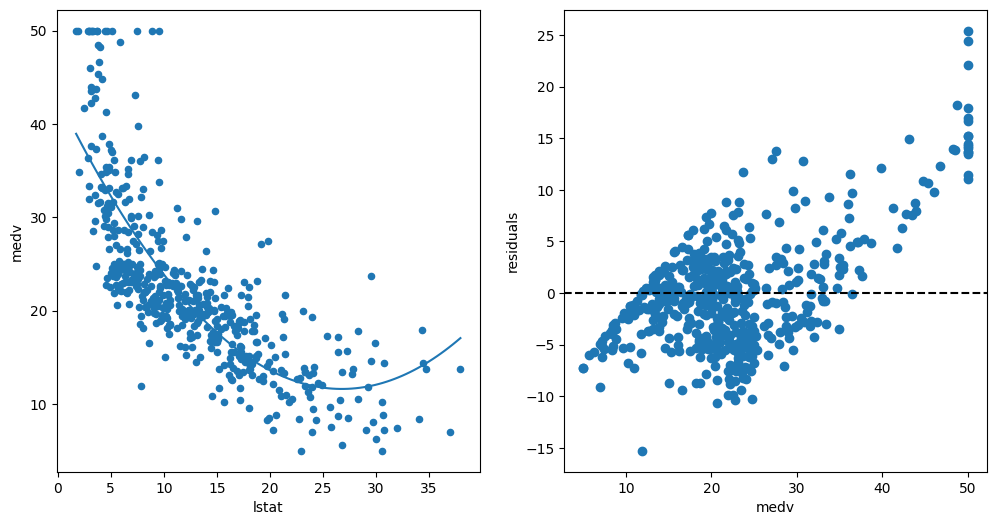

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.plot(kind='scatter', y='medv', x='lstat', ax=ax1)

x_plot = np.linspace(df.lstat.min(), df.lstat.max(), 100)
b0, b1, b2 = lm_fit.params
y_plot = b0 + b1 * x_plot + b2 * x_plot**2
ax1.plot(x_plot, y_plot)

ax2.scatter(df.medv, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residuals')

In [7]:
lm = smf.ols(formula='medv ~ rm + I(rm**2)', data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.46e-87
Time:                        23:03:35   Log-Likelihood:                -1639.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0588     12.104      5.458      0.000      42.278      89.839
rm           -22.6433      3.754     -6.031      0.000     -30.019     -15.267
I(rm ** 2)     2.4701      0.291      8.502      0.000       1.899       3.041
==============================================================================
Omnibus:                       82.173   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.337
Skew:                           0.224   Prob(JB):                    1.29e-203
Kurtosis:                       9.642   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residuals')

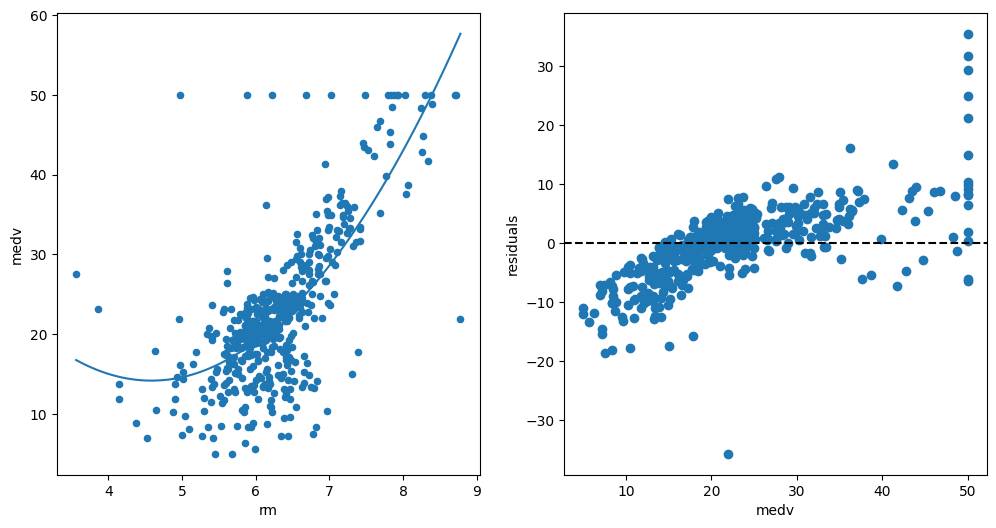

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.plot(kind='scatter', y='medv', x='rm', ax=ax1)

x_plot = np.linspace(df.rm.min(), df.rm.max(), 100)
b0, b1, b2 = lm_fit.params
y_plot = b0 + b1 * x_plot + b2 * x_plot**2
ax1.plot(x_plot, y_plot)

ax2.scatter(df.medv, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residuals')

In [9]:
# W przypadku modeli nieliniowych można wykorzystać zmienne które są ze sobą skorelowane
lm = smf.ols(formula='medv ~ lstat+ I(lstat**2) + rm + I(rm**2)', data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     377.7
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          1.09e-149
Time:                        23:03:35   Log-Likelihood:                -1488.5
No. Observations:                 506   AIC:                             2987.
Df Residuals:                     501   BIC:                             3008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       105.0840      9.939     10.573      0.000      85.557     124.611
lstat            -1.4162      0.120    -11.771      0.000      -1.653      -1.180
I(lstat ** 2)     0.0218      0.004      6.217      0.000       0.015       0.029
rm              -26.0094      3.103     -8.382      0.000     -32.106     -19.913
I(rm ** 2)        2.3561      0.240      9.817      0.000       1.885       2.828
==============================================================================
Omnibus:                      138.644   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1576.913
Skew:                           0.839   Prob(JB):                         0.00
Kurtosis:                      11.484   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

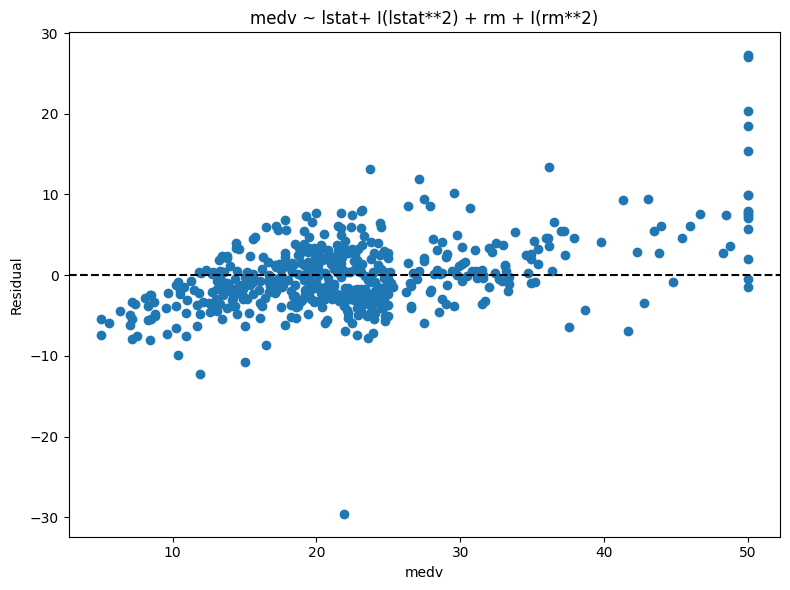

In [10]:
X_data = pd.DataFrame({
    'lstat': df['lstat'],
    'lstat_sq': df['lstat']**2,
    'rm': df['rm'],
    'rm_sq': df['rm']**2
})

X = sm.add_constant(X_data)
y = df.medv

lm_complex_OLS = sm.OLS(y, X)
lm_complex_fit = lm_complex_OLS.fit()

plt.figure(figsize=(8, 6))
plt.scatter(df.medv, lm_complex_fit.resid)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('medv')
plt.ylabel('Residual')
plt.title('medv ~ lstat+ I(lstat**2) + rm + I(rm**2)')
plt.tight_layout()
plt.show()

In [11]:
lm = smf.ols(formula='medv ~ rm * crim', data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     232.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.54e-94
Time:                        23:03:35   Log-Likelihood:                -1619.9
No. Observations:                 506   AIC:                             3248.
Df Residuals:                     502   BIC:                             3265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.2573      2.736    -13.616      0.000     -42.633     -31.881
rm             9.6515      0.428     22.526      0.000       8.810      10.493
crim           1.4629      0.253      5.783      0.000       0.966       1.960
rm:crim       -0.2877      0.042     -6.885      0.000      -0.370      -0.206
==============================================================================
Omnibus:                      226.464   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1917.135
Skew:                           1.741   Prob(JB):                         0.00
Kurtosis:                      11.877   Cond. No.                         590.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm = smf.ols(formula='medv ~ lstat * ptratio', data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     280.4
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          7.52e-107
Time:                        23:03:35   Log-Likelihood:                -1591.3
No. Observations:                 506   AIC:                             3191.
Df Residuals:                     502   BIC:                             3207.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        72.7614      4.256     17.098      0.000      64.400      81.122
lstat            -2.4761      0.325     -7.614      0.000      -3.115      -1.837
ptratio          -2.1698      0.236     -9.206      0.000      -2.633      -1.707
lstat:ptratio     0.0884      0.017      5.127      0.000       0.055       0.122
==============================================================================
Omnibus:                      158.068   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.584
Skew:                           1.470   Prob(JB):                    1.79e-107
Kurtosis:                       6.831   Cond. No.                     4.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
lm = smf.ols(formula='medv ~ lstat + I(lstat**2) + rm + I(rm**2) + lstat:rm', data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     312.0
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          3.79e-151
Time:                        23:03:35   Log-Likelihood:                -1482.0
No. Observations:                 506   AIC:                             2976.
Df Residuals:                     500   BIC:                             3001.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        61.0081     15.696      3.887      0.000      30.170      91.847
lstat             0.3710      0.510      0.727      0.468      -0.632       1.374
I(lstat ** 2)     0.0091      0.005      1.844      0.066      -0.001       0.019
rm              -15.3604      4.261     -3.605      0.000     -23.732      -6.989
I(rm ** 2)        1.7283      0.294      5.871      0.000       1.150       2.307
lstat:rm         -0.2312      0.064     -3.600      0.000      -0.357      -0.105
==============================================================================
Omnibus:                      169.606   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2154.012
Skew:                           1.079   Prob(JB):                         0.00
Kurtosis:                      12.875   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

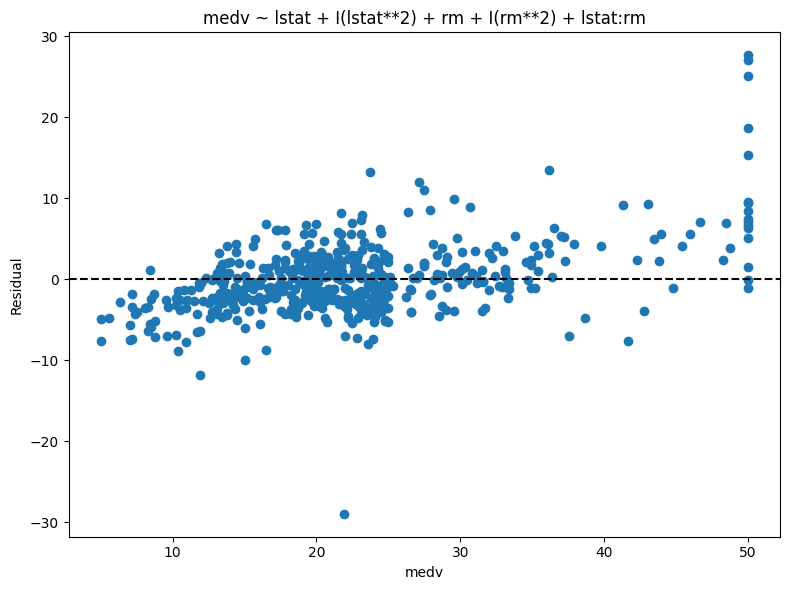

In [14]:
X_data = pd.DataFrame({
    'lstat': df['lstat'],
    'lstat_sq': df['lstat']**2,
    'rm': df['rm'],
    'rm_sq': df['rm']**2,
    'lstat_rm': df['lstat'] * df['rm']
})

X = sm.add_constant(X_data)
y = df.medv

lm_complex_OLS = sm.OLS(y, X)
lm_complex_fit = lm_complex_OLS.fit()

plt.figure(figsize=(8, 6))
plt.scatter(df.medv, lm_complex_fit.resid)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('medv')
plt.ylabel('Residual')
plt.title('medv ~ lstat + I(lstat**2) + rm + I(rm**2) + lstat:rm')
plt.tight_layout()
plt.show()

In [15]:
lm = smf.ols(formula='medv ~ lstat + I(lstat**2) + rm + I(rm**2) + ptratio + crim + lstat:ptratio + rm:crim', data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     219.6
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          9.00e-158
Time:                        23:03:35   Log-Likelihood:                -1457.8
No. Observations:                 506   AIC:                             2934.
Df Residuals:                     497   BIC:                             2972.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       112.5862     11.326      9.940      0.000      90.333     134.840
lstat            -1.2609      0.295     -4.280      0.000      -1.840      -0.682
I(lstat ** 2)     0.0191      0.004      5.254      0.000       0.012       0.026
rm              -25.3318      3.173     -7.983      0.000     -31.566     -19.097
I(rm ** 2)        2.2969      0.241      9.549      0.000       1.824       2.769
ptratio          -0.5983      0.209     -2.868      0.004      -1.008      -0.188
crim             -0.0222      0.227     -0.098      0.922      -0.468       0.424
lstat:ptratio     0.0029      0.015      0.197      0.844      -0.026       0.032
rm:crim          -0.0164      0.037     -0.443      0.658      -0.089       0.056
==============================================================================
Omnibus:                      234.508   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3745.308
Skew:                           1.595   Prob(JB):                         0.00
Kurtosis:                      15.941   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

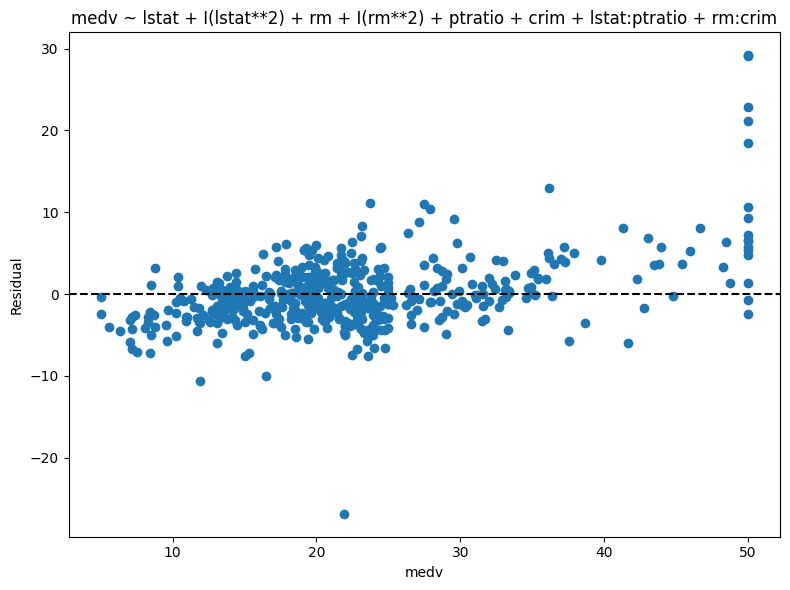

In [16]:
X_data = pd.DataFrame({
    'lstat': df['lstat'],
    'lstat_sq': df['lstat']**2,
    'rm': df['rm'],
    'rm_sq': df['rm']**2,
    'ptratio': df['ptratio'],
    'crim': df['crim'],
    'lstat_ptratio': df['lstat'] * df['ptratio'],
    'rm_crim': df['rm'] * df['crim']
})

X = sm.add_constant(X_data)
y = df.medv

lm_complex_OLS = sm.OLS(y, X)
lm_complex_fit = lm_complex_OLS.fit()

plt.figure(figsize=(8, 6))
plt.scatter(df.medv, lm_complex_fit.resid)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('medv')
plt.ylabel('Residual')
plt.title('medv ~ lstat + I(lstat**2) + rm + I(rm**2) + ptratio + crim + lstat:ptratio + rm:crim')
plt.tight_layout()
plt.show()

## Zadanie 2
Zaimplementuj metodę forward selection i zastosuj ją dla danych `boston`. Do porównania/ewaluacji modeli można stosować np. miarę Adjusted $R^2$ lub zbiór walidacyjny.

In [17]:
X_all = df.drop('medv', axis=1)
y = df['medv'] # Zmienna objaśniana

In [18]:
def forward_selection(X, y):
    selected_features = []
    remaining_features = list(X.columns)
    # Inicjalizacja niską wartością dla R^2 adj
    current_best_score = -np.inf 

    # Pętla główna: kontynuuj, dopóki są zmienne do rozważenia
    # Dodatkowy warunek: upewnij się, że nie wybraliśmy wszystkich zmiennych
    while remaining_features and len(selected_features) < len(X.columns):
        # Najlepszy wynik w bieżącym kroku
        step_best_score = current_best_score
        # Zmienna wybrana do dodania w tym kroku
        feature_to_add_in_step = None 

        print(f"\nKrok: Rozważanie dodania jednej zmiennej do: {selected_features if selected_features else '[Brak zmiennych]'}")

        # Pętla wewnętrzna: testuj każdą pozostałą zmienną
        for feature_candidate in remaining_features:
            # Utwórz tymczasową listę zmiennych do przetestowania (obecne + kandydat)
            features_to_test = selected_features + [feature_candidate]

            # Przygotuj macierz X dla tymczasowego modelu
            X_temp = X[features_to_test]
            # Dodaj stałą
            X_temp_const = sm.add_constant(X_temp)

            # Dopasuj tymczasowy model
            model_temp = sm.OLS(y, X_temp_const).fit()

            # Oblicz wynik dla R^2 adj
            score = model_temp.rsquared_adj

            # Sprawdź, czy ten model jest lepszy niż dotychczas najlepszy w tym kroku
            # Upewnij się, że score nie jest NaN (może się zdarzyć przy problemach z danymi)
            if not np.isnan(score) and score > step_best_score:
                step_best_score = score
                feature_to_add_in_step = feature_candidate

        # Po przetestowaniu wszystkich kandydatów: Sprawdź, czy najlepszy wynik w tym kroku
        # faktycznie poprawia model w porównaniu do modelu z poprzedniego kroku
        if step_best_score > current_best_score:
            current_best_score = step_best_score
            # Dodaj wybraną zmienną do listy
            selected_features.append(feature_to_add_in_step)
            # Usuń ją z listy pozostałych
            remaining_features.remove(feature_to_add_in_step) 
            print(f"Wybrana zmienna w tym kroku: {feature_to_add_in_step}. Aktualne R^2: {current_best_score:.4f}")
        else:
            # Jeśli najlepszy wynik w tym kroku nie jest lepszy od wyniku z poprzedniego kroku, zatrzymaj się
            print("Zatrzymanie selekcji: Brak dalszej poprawy w R^2.")
            break

    print("\n--- Koniec selekcji Forward Selection ---")
    print(f"Wybrane zmienne ({len(selected_features)}): {selected_features}")

    # Dopasuj model końcowy z wybranymi zmiennymi
    X_final = X[selected_features]
    X_final_const = sm.add_constant(X_final)
    final_model = sm.OLS(y, X_final_const).fit()
    print("\n--- Podsumowanie Modelu Końcowego ---")
    print(final_model.summary())

    return selected_features, final_model

In [19]:
selected_vars_from_csv, final_regression_model_csv = forward_selection(X_all, y)


Krok: Rozważanie dodania jednej zmiennej do: [Brak zmiennych]
Wybrana zmienna w tym kroku: lstat. Aktualne R^2: 0.5432

Krok: Rozważanie dodania jednej zmiennej do: ['lstat']
Wybrana zmienna w tym kroku: rm. Aktualne R^2: 0.6371

Krok: Rozważanie dodania jednej zmiennej do: ['lstat', 'rm']
Wybrana zmienna w tym kroku: ptratio. Aktualne R^2: 0.6767

Krok: Rozważanie dodania jednej zmiennej do: ['lstat', 'rm', 'ptratio']
Wybrana zmienna w tym kroku: dis. Aktualne R^2: 0.6878

Krok: Rozważanie dodania jednej zmiennej do: ['lstat', 'rm', 'ptratio', 'dis']
Wybrana zmienna w tym kroku: nox. Aktualne R^2: 0.7052

Krok: Rozważanie dodania jednej zmiennej do: ['lstat', 'rm', 'ptratio', 'dis', 'nox']
Wybrana zmienna w tym kroku: chas. Aktualne R^2: 0.7124

Krok: Rozważanie dodania jednej zmiennej do: ['lstat', 'rm', 'ptratio', 'dis', 'nox', 'chas']
Wybrana zmienna w tym kroku: b. Aktualne R^2: 0.7183

Krok: Rozważanie dodania jednej zmiennej do: ['lstat', 'rm', 'ptratio', 'dis', 'nox', 'chas', 

## Zadanie 3

Wczytaj zbiór danych w pliku `housing.csv`, 
- Usuń wiersze zawierające brakujące dane (lub zastąp wartością średnią).
- Koduj zmienną `ocean_proximity` (np. metodą `get_dummies()`).
- Modeluj zależność `median_house_value` od `ocean_proximity`.

In [20]:
housing = pd.read_csv("./data/housing.csv")
print(housing.shape)
df.head()

(20640, 10)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
housing0 = housing.dropna(axis=0)
housing0.info()
housing0.shape

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


(20433, 10)

In [23]:
housing0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
housing_encoded = pd.get_dummies(housing0, columns=['ocean_proximity'], drop_first=True, dtype=float)
print(housing_encoded.shape)
housing_encoded.head()

(20433, 13)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


<Axes: >

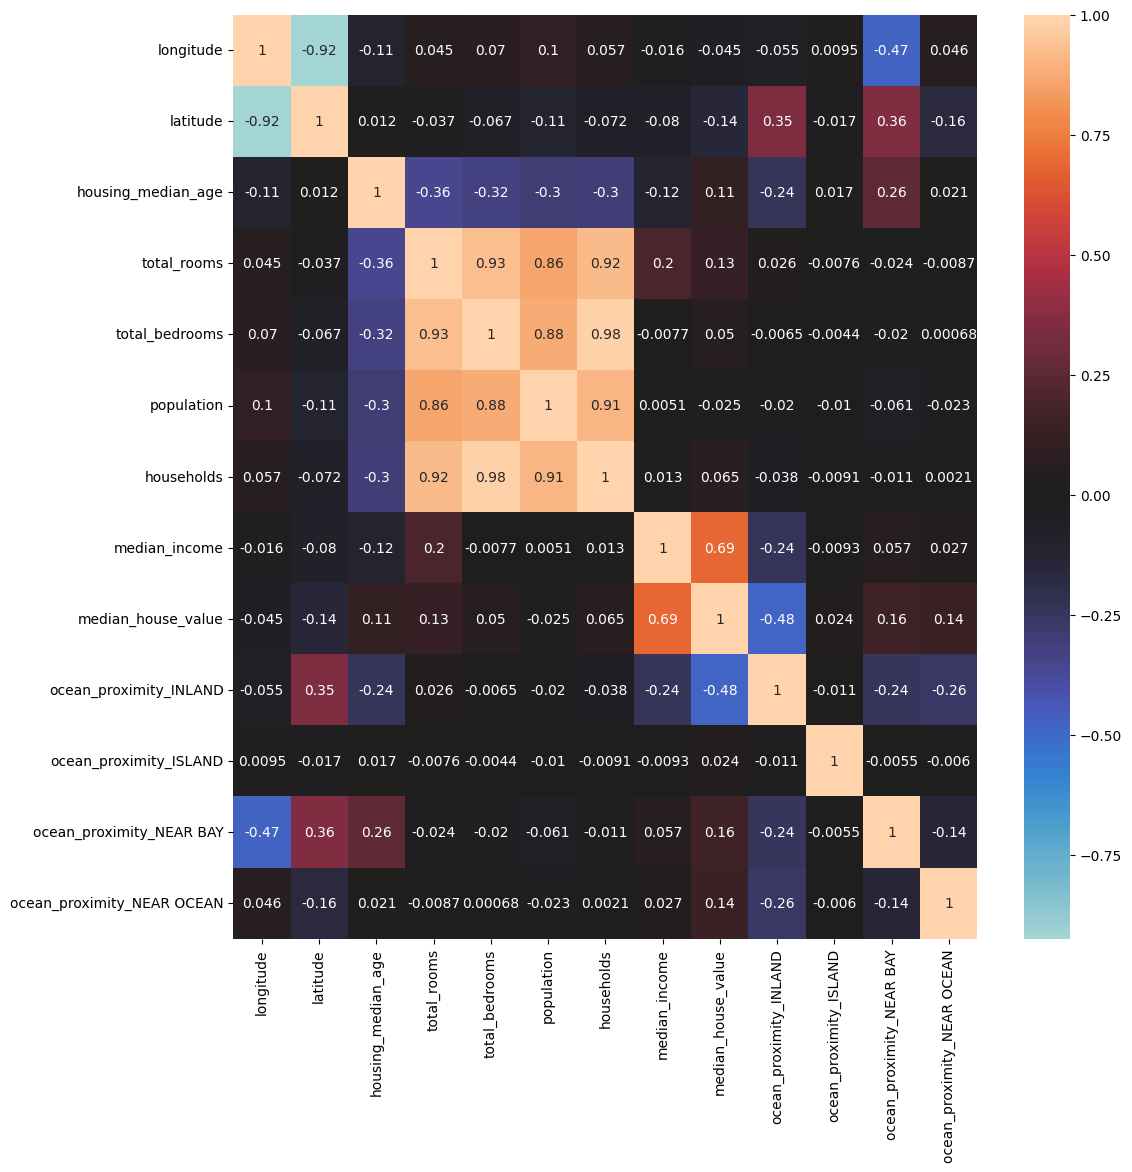

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(housing_encoded.corr(), annot=True, center=0.0, ax=ax)

In [26]:
y = housing_encoded['median_house_value']
ocean_proximity_dummy_cols = [col for col in housing_encoded.columns if col.startswith('ocean_proximity_')]
X = housing_encoded[ocean_proximity_dummy_cols]

X = sm.add_constant(X)

model = sm.OLS(y, X)

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1595.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:03:36   Log-Likelihood:            -2.6439e+05
No. Observations:               20433   AIC:                         5.288e+05
Df Residuals:                   20428   BIC:                         5.288e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.403e+05   1060.309    226.602      0.000    2.38e+05    2.42e+05
ocean_proximity_INLAND     -1.154e+05   1639.439    -70.372      0.000   -1.19e+05   -1.12e+05
ocean_proximity_ISLAND      1.402e+05   4.51e+04      3.109      0.002    5.18e+04    2.29e+05
ocean_proximity_NEAR BAY    1.901e+04   2366.114      8.035      0.000    1.44e+04    2.36e+04
ocean_proximity_NEAR OCEAN  8774.3642   2233.605      3.928      0.000    4396.319    1.32e+04
==============================================================================
Omnibus:                     2642.118   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3813.790
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       3.754   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y = housing_encoded['median_house_value']
ocean_proximity_dummy_cols = [col for col in housing_encoded.columns if col.startswith('ocean_proximity_')]
selected_numerical_cols = ['median_income', 'longitude', 'latitude', 'housing_median_age']

predictor_cols = ocean_proximity_dummy_cols + selected_numerical_cols

X = housing_encoded[predictor_cols]

X = sm.add_constant(X)

model = sm.OLS(y, X)

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3954.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:03:36   Log-Likelihood:            -2.5761e+05
No. Observations:               20433   AIC:                         5.152e+05
Df Residuals:                   20424   BIC:                         5.153e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.079e+06   9.12e+04    -22.797      0.000   -2.26e+06    -1.9e+06
ocean_proximity_INLAND     -4.439e+04   1820.714    -24.380      0.000    -4.8e+04   -4.08e+04
ocean_proximity_ISLAND       1.69e+05   3.24e+04      5.222      0.000    1.06e+05    2.32e+05
ocean_proximity_NEAR BAY    5147.0484   2001.034      2.572      0.010    1224.862    9069.235
ocean_proximity_NEAR OCEAN  9305.0410   1640.666      5.672      0.000    6089.204    1.25e+04
median_income               3.733e+04    281.951    132.381      0.000    3.68e+04    3.79e+04
longitude                  -2.476e+04   1055.225    -23.467      0.000   -2.68e+04   -2.27e+04
latitude                   -2.332e+04   1039.808    -22.430      0.000   -2.54e+04   -2.13e+04
housing_median_age           827.1623     43.318     19.095      0.000     742.255     912.070
==============================================================================
Omnibus:                     4689.078   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12732.067
Skew:                           1.227   Prob(JB):                         0.00
Kurtosis:                       5.990   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""